In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import ast  # Untuk mengubah string menjadi list

# Membaca file CSV
df = pd.read_csv("D:/sentiment_analysis_result.csv")

# Jika 'tokens' adalah string yang menyerupai list, gunakan ast.literal_eval untuk mengonversinya kembali menjadi list
df['tokens'] = df['tokens'].apply(ast.literal_eval)

# Menggabungkan token menjadi teks
df['tokens_as_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

# Cek apakah hasil token_as_text sudah benar
print(df['tokens_as_text'].head())

# Membuat TfidfVectorizer dengan parameter sesuai
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)

# Menggunakan TfidfVectorizer pada kolom 'tokens_as_text'
tfidf_matrix = tfidf.fit_transform(df['tokens_as_text'])

# Mendapatkan fitur kata (kolom) dari TF-IDF
feature_names = tfidf.get_feature_names_out()

# Mengubah hasil menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Menampilkan hasil
print(tfidf_df)

0    ss azarine bikin kucel enggak_ya iya saran ss ...
1    azarine kak anak nya teman ku usia remaja ngik...
2    nemu promo tarik lazada nih yuk coba lihat nam...
3    kode cantik agu habis diskon sd ribu minbel ri...
4    bego nya pakai azarine enggak_habishabis jaran...
Name: tokens_as_text, dtype: object
      acid      acne  affordable  agustus   ah      ajar  ajg  ala  alcohol  \
0      0.0  0.000000         0.0      0.0  0.0  0.367419  0.0  0.0      0.0   
1      0.0  0.000000         0.0      0.0  0.0  0.000000  0.0  0.0      0.0   
2      0.0  0.000000         0.0      0.0  0.0  0.000000  0.0  0.0      0.0   
3      0.0  0.000000         0.0      0.0  0.0  0.000000  0.0  0.0      0.0   
4      0.0  0.000000         0.0      0.0  0.0  0.000000  0.0  0.0      0.0   
...    ...       ...         ...      ...  ...       ...  ...  ...      ...   
1406   0.0  0.000000         0.0      0.0  0.0  0.000000  0.0  0.0      0.0   
1407   0.0  0.000000         0.0      0.0  0.0  0.000000 

## Balancing Data

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Memuat data (gantilah dengan jalur file Anda)
# df = pd.read_csv('path_to_your_data.csv') 
# Asumsi df memiliki kolom 'text' untuk tweet dan 'sentiment' untuk label

# Ganti ini sesuai kolom teks yang sudah ditokenisasi
X = df['tokens_as_text']  
y = df['sentiment']  # Sesuaikan ini dengan kolom label Anda

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan RandomOverSampler untuk oversampling
over = RandomOverSampler(sampling_strategy={'Positive': 600, 'Negative': 200})  # Sesuaikan kebutuhan
X_over, y_over = over.fit_resample(X_train.values.reshape(-1, 1), y_train)
print(f"Oversampled: {Counter(y_over)}")

# Menggunakan RandomUnderSampler untuk undersampling
under = RandomUnderSampler(sampling_strategy={'Neutral': 830})  # Sesuaikan kebutuhan
X_res, y_res = under.fit_resample(X_over, y_over)
print(f"After undersampling: {Counter(y_res)}")

# Mengubah teks menjadi fitur menggunakan TF-IDF
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X_train_tfidf = tfidf.fit_transform(X_res.ravel())
X_test_tfidf = tfidf.transform(X_test)

# Inisialisasi dan latih model SVM
model = SVC(kernel='linear')  # Anda bisa mengganti kernel sesuai kebutuhan
model.fit(X_train_tfidf, y_res)

# Prediksi pada data uji
y_pred = model.predict(X_test_tfidf)

# Evaluasi hasil
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Distribution of labels in training set: {Counter(y_res)}")
print(f"Distribution of labels in test set: {Counter(y_test)}")

Oversampled: Counter({'Neutral': 830, 'Positive': 600, 'Negative': 200})
After undersampling: Counter({'Neutral': 830, 'Positive': 600, 'Negative': 200})
Accuracy: 0.7773851590106007
Classification Report:
               precision    recall  f1-score   support

    Negative       0.22      0.14      0.17        14
     Neutral       0.83      0.91      0.87       201
    Positive       0.64      0.53      0.58        68

    accuracy                           0.78       283
   macro avg       0.57      0.53      0.54       283
weighted avg       0.76      0.78      0.77       283

Distribution of labels in training set: Counter({'Neutral': 830, 'Positive': 600, 'Negative': 200})
Distribution of labels in test set: Counter({'Neutral': 201, 'Positive': 68, 'Negative': 14})


## Matrix Confusion

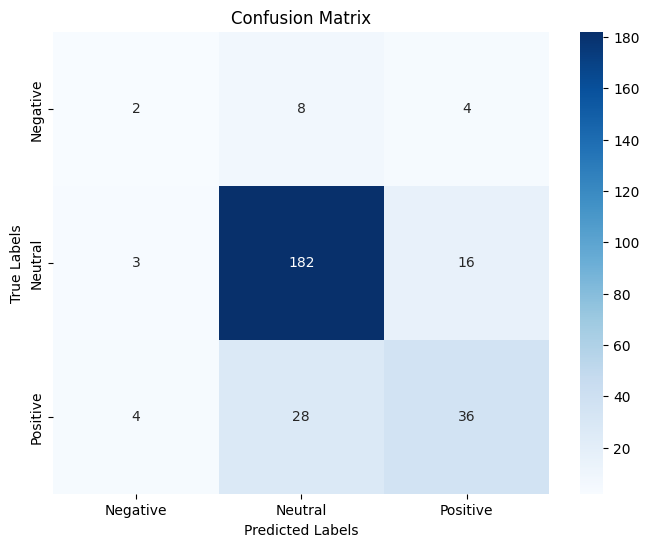

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Membuat visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Diagram Chart

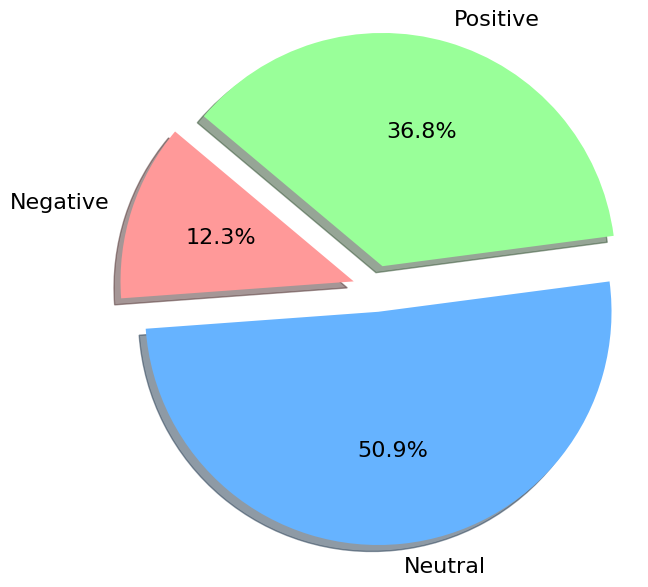

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

# Menghitung distribusi dari label di test set
sentiment_counts = Counter(y_res)

# Menyiapkan data untuk pie chart
labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['#ff9999','#66b3ff','#99ff99']  # Warna untuk pie chart
explode = (0.1, 0.1, 0.1)  # Membuat slice terpisah untuk visualisasi yang lebih jelas

# Membuat pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140,
        textprops={'color': 'black', 'fontsize': 16})


# Menampilkan pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


## Dont USE

In [16]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Mengubah teks menjadi fitur berbasis frekuensi dengan CountVectorizer
# count_vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
# X_count = count_vectorizer.fit_transform(df['tokens_as_text'])

# Inisialisasi model LDA
lda = LatentDirichletAllocation(n_components=6, random_state=42)  # n_components adalah jumlah topik
lda.fit(tfidf_matrix)

# Mendapatkan kata-kata penting untuk setiap topik
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Menampilkan 10 kata teratas untuk setiap topik
no_top_words = 20
feature_names = tfidf.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)


Topic 1:
premium avoskin bau enggak_bisa blurring fomo minyak gila badan lembab pilih korea juara like exp oke pha power luminous enggak_dempul
Topic 2:
avoskin korea bundle mu kah minyak azarine badan fomo bundling cleanser my enggak_sih jenis foundation glowing gading intinga premium foam
Topic 3:
nder enggak_bisa elformula avoskin moisturizing enggak_ribet foam out enggak_jodoh exfo nian event guys gambar buildable instant mending luxcrime badan korea
Topic 4:
azarine avoskin badan foam fia halus lazada enggak_bisa cocok nder carasun anjay light korea enggak_aku lo foto fresh micellar anak
Topic 5:
enggak_jodoh luxcrime instant minho acne avoskin normal botol moisturizing blush nder fokus giveaway mending jateng elformula oil ferulic bibir banget
Topic 6:
avoskin cream kering longlasting nyaman mending jarang hanasui kempis badan powder enakkk parah kurleb filter jastip miracle minion bukan_gel arti


In [17]:
# Mendapatkan distribusi topik untuk setiap dokumen
topic_distribution = lda.transform(tfidf_matrix)

# Menampilkan distribusi topik untuk beberapa dokumen pertama
print(topic_distribution[:6])


[[0.12902295 0.7099892  0.04101915 0.04009728 0.03992525 0.03994617]
 [0.04550705 0.60839555 0.04551625 0.20949657 0.04543916 0.04564541]
 [0.83718581 0.03244433 0.03266807 0.03206978 0.03361668 0.03201535]
 [0.74367857 0.03709761 0.1077442  0.03716085 0.03722326 0.03709552]
 [0.04198154 0.79013673 0.04204892 0.04209802 0.04189342 0.04184137]
 [0.7455213  0.05135125 0.05088417 0.0507398  0.05081383 0.05068965]]


In [18]:
# Menghitung Perplexity
perplexity_score = lda.perplexity(tfidf_matrix)
print(f"Perplexity: {perplexity_score}")


Perplexity: 847.8398019651321


In [19]:
import gensim
from gensim.models.coherencemodel import CoherenceModel

# Mengubah 'tokens_as_text' menjadi token kembali
texts = df['tokens']  # Pastikan kolom 'tokens' berisi token yang sudah dievaluasi sebelumnya

# Membuat Dictionary dan Corpus
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Konversi model LDA dari sklearn ke format gensim
lda_gensim = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=6, random_state=42)

# Menghitung koherensi menggunakan 'c_v'
coherence_model_lda = CoherenceModel(model=lda_gensim, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()

print(f"Coherence Score: {coherence_score}")


Coherence Score: 0.3395014189648085


## Model LDA

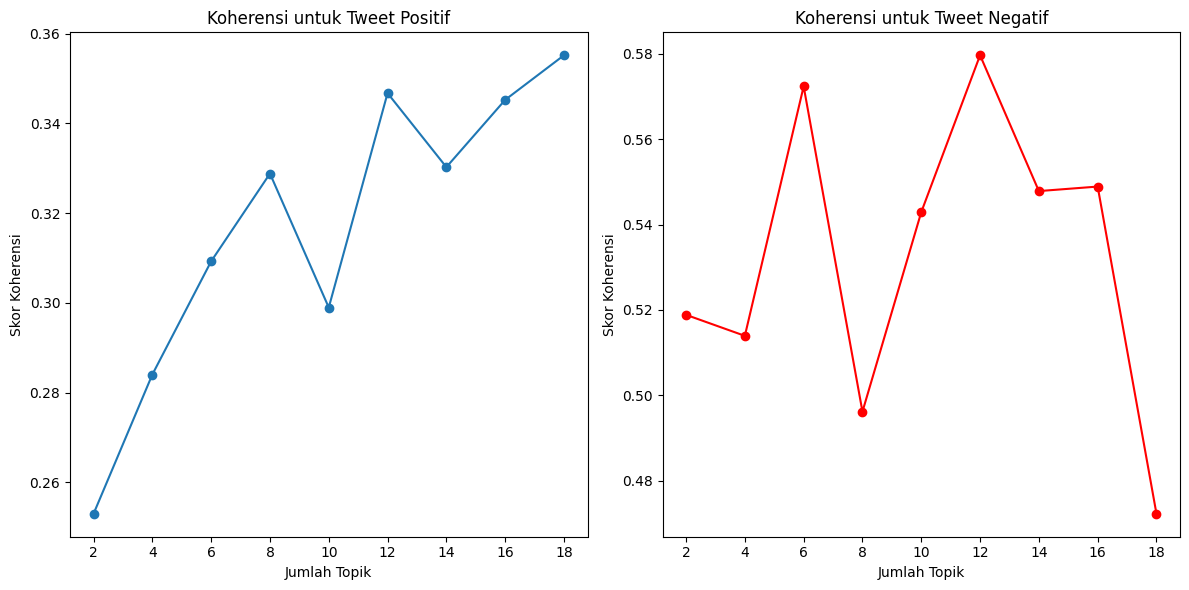

In [20]:
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Fungsi untuk menghitung koherensi untuk berbagai jumlah topik
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Asumsikan df_positive dan df_negative telah terdefinisi
# Texts dalam bentuk token
# Step 1: Filter tweets based on sentiment
df_positive = df[df['sentiment'] == 'Positive']  # Assuming 'sentiment' column holds 'Positive' or 'Negative'
df_negative = df[df['sentiment'] == 'Negative']

# Step 2: Membuat dictionary dan corpus untuk tweet positif
dictionary_positive = gensim.corpora.Dictionary(df_positive['tokens'])
corpus_positive = [dictionary_positive.doc2bow(text) for text in df_positive['tokens']]

# Step 3: Membuat dictionary dan corpus untuk tweet negatif
dictionary_negative = gensim.corpora.Dictionary(df_negative['tokens'])
corpus_negative = [dictionary_negative.doc2bow(text) for text in df_negative['tokens']]

# Step 4: Hitung koherensi untuk tweet positif
model_list_positive, coherence_values_positive = compute_coherence_values(
    dictionary=dictionary_positive, 
    corpus=corpus_positive, 
    texts=df_positive['tokens'], 
    start=2, 
    limit=20, 
    step=2
)

# Step 5: Hitung koherensi untuk tweet negatif
model_list_negative, coherence_values_negative = compute_coherence_values(
    dictionary=dictionary_negative, 
    corpus=corpus_negative, 
    texts=df_negative['tokens'], 
    start=2, 
    limit=20, 
    step=2
)

# Step 6: Visualisasi koherensi untuk tweet positif dan negatif
x = range(2, 20, 2)

plt.figure(figsize=(12, 6))

# Plot untuk tweet positif
plt.subplot(1, 2, 1)
plt.plot(x, coherence_values_positive, marker='o')
plt.title("Koherensi untuk Tweet Positif")
plt.xlabel("Jumlah Topik")
plt.ylabel("Skor Koherensi")

# Plot untuk tweet negatif
plt.subplot(1, 2, 2)
plt.plot(x, coherence_values_negative, marker='o', color='r')
plt.title("Koherensi untuk Tweet Negatif")
plt.xlabel("Jumlah Topik")
plt.ylabel("Skor Koherensi")

plt.tight_layout()
plt.show()


### Coherence Score

In [21]:
import gensim
from gensim.models import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Function to perform LDA and calculate coherence and perplexity
def perform_lda_and_evaluation(df_group, n_topics=6):
    # Convert tokens to text (tokens should already be in list form)
    texts = df_group['tokens']  # Assuming 'tokens' column contains tokenized text
    
    # Step 2: Create dictionary and corpus for Gensim
    dictionary = gensim.corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    # Step 3: Create LDA model using Gensim
    lda_gensim = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=n_topics, random_state=42, passes=10)
    
    # Step 4: Coherence calculation using Gensim CoherenceModel
    coherence_model_lda = CoherenceModel(model=lda_gensim, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    
    # Getting coherence score for each topic
    coherence_per_topic = []
    for topic_id in range(n_topics):
        top_words = [dictionary[word_id] for word_id, _ in lda_gensim.get_topic_terms(topic_id, topn=10)]
        coherence_topic_model = CoherenceModel(topics=[top_words], texts=texts, dictionary=dictionary, coherence='c_v')
        topic_coherence = coherence_topic_model.get_coherence()
        coherence_per_topic.append(topic_coherence)
    
    return lda_gensim, coherence_per_topic, coherence_score

# Step 5: Apply LDA for positive and negative tweets
lda_positive, coherence_per_topic_positive, overall_positive_coherence = perform_lda_and_evaluation(df_positive, n_topics=18)
lda_negative, coherence_per_topic_negative, overall_negative_coherence = perform_lda_and_evaluation(df_negative, n_topics=12)

# Displaying coherence for each topic (positive)
print("Coherence Scores for Positive Topics:")
for i, score in enumerate(coherence_per_topic_positive):
    print(f"Topic {i+1}: {score:.3f}")

# Displaying coherence for each topic (negative)
print("\nCoherence Scores for Negative Topics:")
for i, score in enumerate(coherence_per_topic_negative):
    print(f"Topic {i+1}: {score:.3f}")

# Displaying overall coherence scores
print(f"\nOverall Coherence for Positive Tweets: {overall_positive_coherence:.3f}")
print(f"Overall Coherence for Negative Tweets: {overall_negative_coherence:.3f}")

# Step 6: Displaying the top words for each topic for Positive Tweets
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Getting top 10 words for each topic
print("\nTop words for Positive topics:")
for idx, topic in lda_positive.print_topics(num_topics=18, num_words=10):
    print(f"Topic {idx+1}: {topic}")

print("\nTop words for Negative topics:")
for idx, topic in lda_negative.print_topics(num_topics=12, num_words=10):
    print(f"Topic {idx+1}: {topic}")


Coherence Scores for Positive Topics:
Topic 1: 0.414
Topic 2: 0.248
Topic 3: 0.379
Topic 4: 0.353
Topic 5: 0.382
Topic 6: 0.343
Topic 7: 0.278
Topic 8: 0.366
Topic 9: 0.334
Topic 10: 0.272
Topic 11: 0.439
Topic 12: 0.264
Topic 13: 0.576
Topic 14: 0.306
Topic 15: 0.324
Topic 16: 0.281
Topic 17: 0.448
Topic 18: 0.669

Coherence Scores for Negative Topics:
Topic 1: 0.887
Topic 2: 0.437
Topic 3: 0.271
Topic 4: 0.841
Topic 5: 0.885
Topic 6: 0.640
Topic 7: 0.248
Topic 8: 0.262
Topic 9: 0.665
Topic 10: 0.894
Topic 11: 0.293
Topic 12: 0.279

Overall Coherence for Positive Tweets: 0.355
Overall Coherence for Negative Tweets: 0.580

Top words for Positive topics:
Topic 1: 0.048*"azarine" + 0.030*"banget" + 0.023*"warna" + 0.023*"kalo" + 0.020*"cocok" + 0.017*"pakai" + 0.013*"sih" + 0.013*"ya" + 0.013*"kulit" + 0.013*"kering"
Topic 2: 0.051*"azarine" + 0.018*"pakai" + 0.013*"st" + 0.013*"serum" + 0.013*"harga" + 0.013*"worth" + 0.009*"kalo" + 0.009*"wardah" + 0.009*"biru" + 0.009*"ku"
Topic 3: 0.

### Perplexity Score

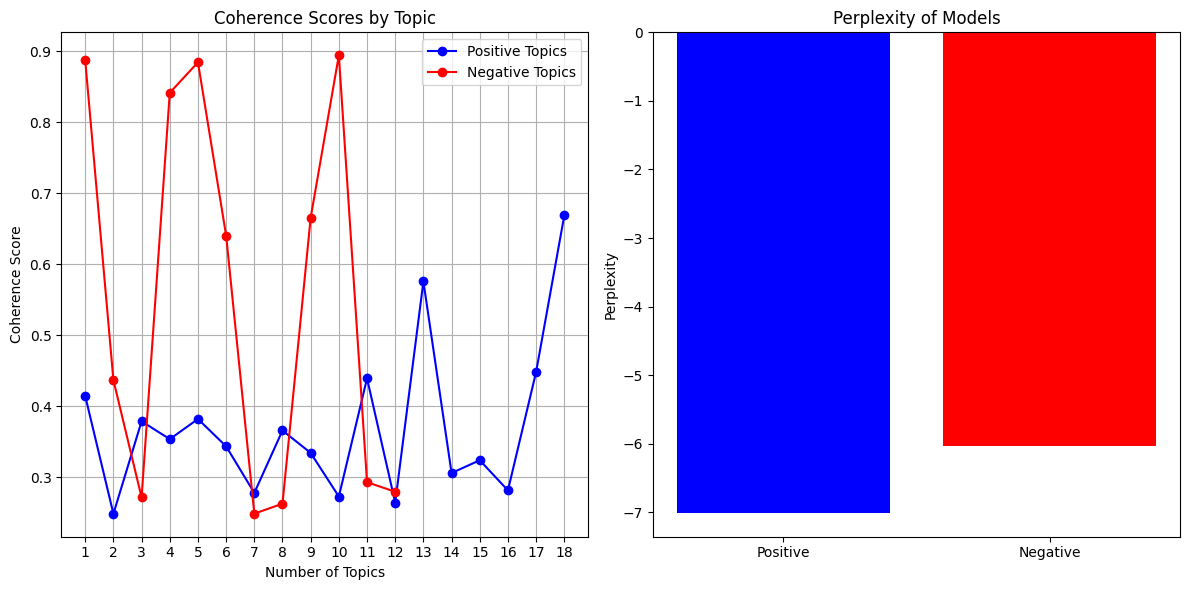

-7.006894393773179
-6.027098656541878


In [31]:
corpus = [dictionary.doc2bow(text) for text in texts]  # Ensure 'texts' are tokenized

# Ensure this is defined in your code
texts_positive = df_positive['tokens']  # Replace with your DataFrame column for positive tweets
texts_negative = df_negative['tokens']  # Replace with your DataFrame column for negative tweets

# Create dictionary and corpus for both models
dictionary_positive = gensim.corpora.Dictionary(texts_positive)
corpus_positive = [dictionary_positive.doc2bow(text) for text in texts_positive]

dictionary_negative = gensim.corpora.Dictionary(texts_negative)
corpus_negative = [dictionary_negative.doc2bow(text) for text in texts_negative]

# Fit LDA models (if not done already)
lda_positive = gensim.models.LdaModel(corpus=corpus_positive, id2word=dictionary_positive, num_topics=18, random_state=42, passes=10)
lda_negative = gensim.models.LdaModel(corpus=corpus_negative, id2word=dictionary_negative, num_topics=12, random_state=42, passes=10)

# Calculate perplexity
perplexity_positive = lda_positive.log_perplexity(corpus_positive)  # For positive model
perplexity_negative = lda_negative.log_perplexity(corpus_negative)  # For negative model

# Plotting as before
plot_coherence_perplexity(coherence_per_topic_positive, coherence_per_topic_negative, perplexity_positive, perplexity_negative)

print(perplexity_positive)
print(perplexity_negative)


### Grafik coherence full and per topic

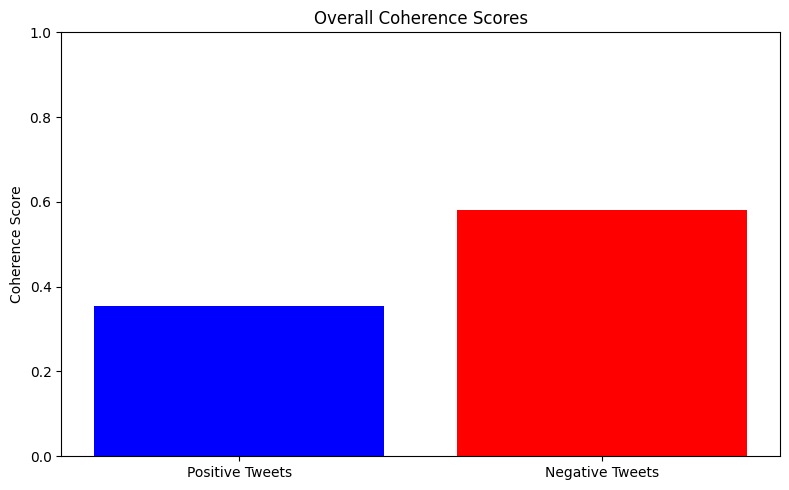

In [34]:
import matplotlib.pyplot as plt

# Coherence scores
overall_coherence = [0.355, 0.580]
labels = ['Positive Tweets', 'Negative Tweets']

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, overall_coherence, color=['blue', 'red'])
plt.title('Overall Coherence Scores')
plt.ylabel('Coherence Score')
plt.ylim(0, 1)  # Set the y-axis limit for better visualization
# Add gridlines for better readability

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\Najma Akmalina Ni'ma\AppData\Local\Temp\ipykernel_6804\2300973169.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topics_positive, y=coherence_per_topic_positive, palette='Blues_d')
C:\Users\Najma Akmalina Ni'ma\AppData\Local\Temp\ipykernel_6804\2300973169.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topics_negative, y=coherence_per_topic_negative, palette='Reds_d')


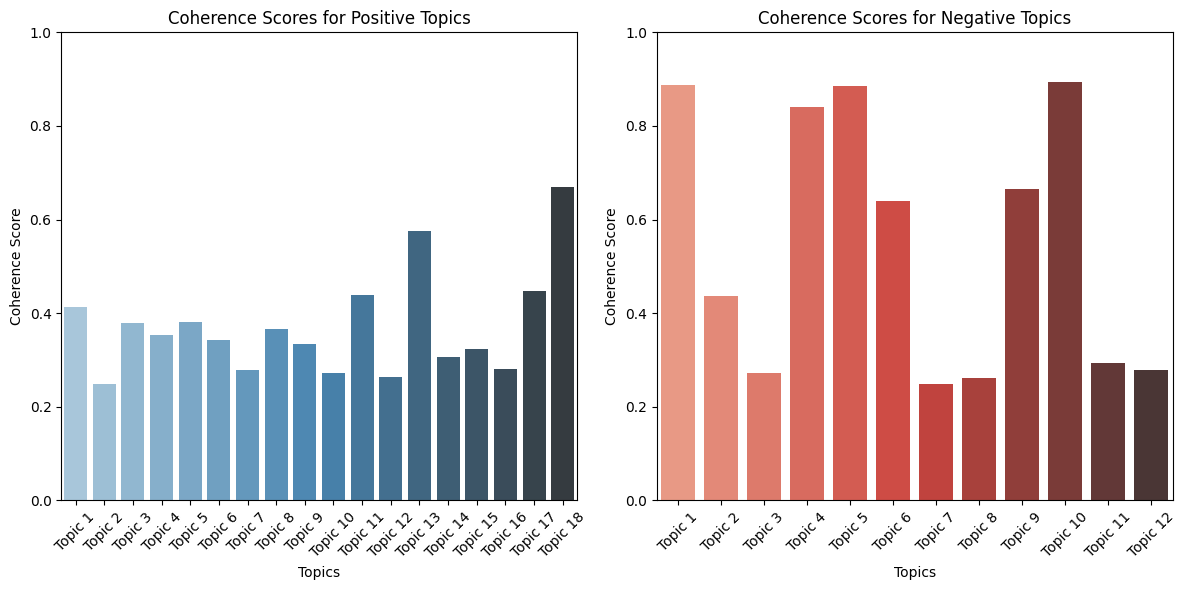

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 7: Plotting coherence scores for positive and negative topics
def plot_coherence_scores(coherence_per_topic_positive, coherence_per_topic_negative):
    # List of topic numbers for positive and negative
    topics_positive = [f'Topic {i+1}' for i in range(len(coherence_per_topic_positive))]
    topics_negative = [f'Topic {i+1}' for i in range(len(coherence_per_topic_negative))]

    # Plot for Positive Tweets
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.barplot(x=topics_positive, y=coherence_per_topic_positive, palette='Blues_d')
    plt.title('Coherence Scores for Positive Topics')
    plt.xlabel('Topics')
    plt.ylabel('Coherence Score')
    plt.xticks(rotation=45)  # Rotate x-axis labels if too many topics
    plt.ylim(0, 1)  # Set y-axis limit for better comparison

    # Plot for Negative Tweets
    plt.subplot(1, 2, 2)
    sns.barplot(x=topics_negative, y=coherence_per_topic_negative, palette='Reds_d')
    plt.title('Coherence Scores for Negative Topics')
    plt.xlabel('Topics')
    plt.ylabel('Coherence Score')
    plt.xticks(rotation=45)  # Rotate x-axis labels if too many topics
    plt.ylim(0, 1)  # Keep the same y-axis limit for comparison

    plt.tight_layout()
    plt.show()

# Call the function to plot the coherence scores
plot_coherence_scores(coherence_per_topic_positive, coherence_per_topic_negative)
